<a href="https://colab.research.google.com/github/obengdouglas/Understanding-historical-imdb-movie-data_EDA-and-regression-analysis/blob/main/Data_processing_and_EDA_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Overview

This project explores the imdb movie data found [here]()
Skills used include how to load data into pandas, manipulate columns, rows and subsets of dataframes, perform string manipulation, regex, merging of dataframes, groupby, sorting of values, as well as know how to perform basic statistics on dataframes.

I also use libraries like scipy, sklearn and pytorch for regression analysis.

# Libraries and Files


In [1]:
#import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns
import sklearn
import scipy
import torch
import torch.nn as nn
import torch.optim as optim


In [5]:
#1. Read the files 'title.basics.tsv.gz', 'title.akas.tsv.gz' and 'title.ratings.tsv.gz' into three separate dataframes using the read_csv method in Pandas.

url_akas='https://raw.githubusercontent.com/obengdouglas/Understanding-historical-imdb-movie-data_EDA-and-regression-analysis/main/data/title.akas.tsv.gz'
url_basics='https://raw.githubusercontent.com/obengdouglas/Understanding-historical-imdb-movie-data_EDA-and-regression-analysis/main/data/title.basics.tsv.gz'
url_ratings='https://raw.githubusercontent.com/obengdouglas/Understanding-historical-imdb-movie-data_EDA-and-regression-analysis/main/data/title.ratings.tsv.gz'

df_akas = pd.read_csv(url_akas, compression='gzip', sep='\t', quotechar='"', on_bad_lines='skip')
df_basics = pd.read_csv(url_basics, compression='gzip', sep='\t', quotechar='"', on_bad_lines='skip')
df_ratings = pd.read_csv(url_ratings, compression='gzip', sep='\t', quotechar='"', on_bad_lines='skip')

<ipython-input-5-7cd889b16f2f>:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df_akas = pd.read_csv(url_akas, compression='gzip', sep='\t', quotechar='"', on_bad_lines='skip')
<ipython-input-5-7cd889b16f2f>:8: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_basics = pd.read_csv(url_basics, compression='gzip', sep='\t', quotechar='"', on_bad_lines='skip')


In [6]:
df_akas.describe()
df_akas.head()

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1


In [7]:
df_akas_2 = df_akas.rename(columns={'titleId': 'tconst'})
df_akas_2.head(10)


,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
5,tt0000002,2,A bohóc és kutyái,HU,\N,imdbDisplay,\N,0
6,tt0000002,3,Le clown et ses chiens,FR,\N,\N,\N,0
7,tt0000002,4,Clovnul si cainii sai,RO,\N,imdbDisplay,\N,0
8,tt0000002,5,The Clown and His Dogs,US,\N,\N,literal English title,0
9,tt0000002,6,Клоун и его собаки,RU,\N,\N,\N,0


In [8]:
df_basics.head(10)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,\N,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"
5,tt0000006,short,Chinese Opium Den,Chinese Opium Den,0,1894,\N,1,Short
6,tt0000007,short,Corbett and Courtney Before the Kinetograph,Corbett and Courtney Before the Kinetograph,0,1894,\N,1,"Short,Sport"
7,tt0000008,short,Edison Kinetoscopic Record of a Sneeze,Edison Kinetoscopic Record of a Sneeze,0,1894,\N,1,"Documentary,Short"
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,\N,45,Romance
9,tt0000010,short,Employees Leaving the Lumière Factory,La sortie de l'usine Lumière à Lyon,0,1895,\N,1,"Documentary,Short"


In [9]:
df_ratings.head(10)

,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
5,tt0000006,5.5,88
6,tt0000007,5.5,573
7,tt0000008,5.6,1526
8,tt0000009,5.5,70
9,tt0000010,6.9,5083


# Data Manipulation 1

Drop duplicates, marge, unique, isin, add column, lower case, copy

In [10]:
#2. Drop duplicates in all the dataframes, if there are any.

df_akas_2.drop_duplicates()
df_basics.drop_duplicates()
df_ratings.drop_duplicates()


,tconst,averageRating,numVotes
0,tt0000001,5.8,1422
1,tt0000002,6.4,168
2,tt0000003,6.6,1015
3,tt0000004,6.4,100
4,tt0000005,6.2,1713
...,...,...,...
874198,tt9100972,7.0,5
874199,tt9104810,7.0,7
874200,tt9106766,7.6,5
874201,tt9107292,8.4,10


In [11]:
#3. Using the Pandas 'merge' method, combine all three dataframes using the Title ID (titleID or tconst) to perform the merge and save it into a new dataframe.

imdb_list = [df_akas_2, df_basics, df_ratings]
imdb_merge = reduce(lambda left,right: pd.merge(left,right,on='tconst'), imdb_list)
imdb_merge

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686542,tt9100068,2,Птичий праздник,SUHH,ru,\N,\N,0,short,Ptichiy prazdnik,Ptichiy prazdnik,0,1976,\N,9,"Animation,Short",7.0,5
1686543,tt9100098,1,Малиновка и медведь,SUHH,ru,\N,\N,0,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686544,tt9100098,2,Malinovka i medved,\N,\N,original,\N,1,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686545,tt9100972,1,Kogda Medvezhonok prosnetsya,\N,\N,original,\N,1,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5


In [12]:
imdb_outer = reduce(lambda left,right: pd.merge(left,right, how='outer', on='tconst'), imdb_list)
imdb_outer

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
1,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
2,tt0000001,3.0,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
3,tt0000001,4.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
4,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6740084,tt9120652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #18.93,Episode #18.93,0.0,\N,\N,\N,"Comedy,Drama,Family",NaN,NaN
6740085,tt9120654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Episode #18.95,Episode #18.95,0.0,\N,\N,\N,"Comedy,Drama,Family",NaN,NaN
6740086,tt9120656,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,Upon Arrival,Upon Arrival,0.0,2018,\N,10,"Horror,Short",NaN,NaN
6740087,tt9120782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,videoGame,UEFA Euro 96 England,UEFA Euro 96 England,0.0,1995,\N,\N,\N,NaN,NaN


In [13]:
imdb_left = reduce(lambda left,right: pd.merge(left,right, how='left', on='tconst'), imdb_list)
imdb_left

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0.0,1894,\N,1,"Documentary,Short",5.8,1422.0
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0.0,1892,\N,5,"Animation,Short",6.4,168.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423655,tt9118622,2,Bundesliga Stars 2001,DE,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423656,tt9118622,3,The F.A. Premier League Stars 2001,\N,\N,original,\N,1,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423657,tt9118622,4,LNF Stars 2001,FR,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN
3423658,tt9118622,5,K-League Stars 2001,KR,\N,imdbDisplay,\N,0,videoGame,The F.A. Premier League Stars 2001,The F.A. Premier League Stars 2001,0.0,2000,\N,\N,Sport,NaN,NaN


In [14]:
imdb_right = reduce(lambda left,right: pd.merge(left,right, how='right', on='tconst'), imdb_list)
imdb_right

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1.0,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2.0,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3.0,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4.0,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1.0,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1975951,tt9100972,2.0,Когда Медвежонок проснется,SUHH,ru,\N,\N,0,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5
1975952,tt9104810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,short,Blue,Blue,0,2018,\N,12,"Fantasy,Short",7.0,7
1975953,tt9106766,NaN,NaN,NaN,NaN,NaN,NaN,NaN,video,Hans Teeuwen: Echte rancune,Hans Teeuwen: Echte rancune,0,2018,\N,63,"Comedy,Documentary",7.6,5
1975954,tt9107292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tvEpisode,Kristen Bell,Kristen Bell,0,2018,\N,\N,Talk-Show,8.4,10


In [15]:
imdb_inner = reduce(lambda left,right: pd.merge(left,right, how='inner', on='tconst'), imdb_list)
imdb_inner

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,1,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
1,tt0000001,2,Карменсита,RU,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
2,tt0000001,3,Carmencita,US,\N,\N,\N,0,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
3,tt0000001,4,Carmencita,\N,\N,original,\N,1,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.8,1422
4,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.4,168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686542,tt9100068,2,Птичий праздник,SUHH,ru,\N,\N,0,short,Ptichiy prazdnik,Ptichiy prazdnik,0,1976,\N,9,"Animation,Short",7.0,5
1686543,tt9100098,1,Малиновка и медведь,SUHH,ru,\N,\N,0,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686544,tt9100098,2,Malinovka i medved,\N,\N,original,\N,1,short,Malinovka i medved,Malinovka i medved,0,1983,\N,9,"Animation,Short",7.0,5
1686545,tt9100972,1,Kogda Medvezhonok prosnetsya,\N,\N,original,\N,1,short,Kogda Medvezhonok prosnetsya,Kogda Medvezhonok prosnetsya,0,1979,\N,16,"Animation,Short",7.0,5


In [16]:
#3.1 How many lines does the resulting dataframe have if you use an inner merge or outer merge? Make sure you understand the difference.
# Ref: https://www.datasciencemadesimple.com/join-merge-data-frames-pandas-python/

print('Number of lines with outer merge:', len(imdb_outer.index))
print('Number of lines with inner merge:', len(imdb_inner.index), '(This is the default merge)')

Number of lines with outer merge: 6740089
Number of lines with inner merge: 1686547 (This is the default merge)


In [17]:
# 3.2 Using the unique() method, compute how many different 'titleTypes' there are
# list of different titleTypes

imdb_inner.titleType.unique()

array(['short', 'movie', 'tvMovie', 'tvSeries', 'tvEpisode', 'tvShort',
       'tvMiniSeries', 'tvSpecial', 'video', 'videoGame'], dtype=object)

In [18]:
# 3.2 Using the unique() method, compute how many different 'titleTypes' there are
# number of different titleTypes

imdb_inner.titleType.nunique()

10

In [19]:
# 4. Make a new dataframe from step 3 by selecting only rows corresponding to English-language films ('en') OR US-region films ('US')
# AND only those that are movies (using the 'titleType' column). Put the resulting data into a new dataframe; call it df_new.

df_new0 = imdb_inner[imdb_inner["language"].isin(['en', 'us'])]
df_new = df_new0[df_new0["titleType"].isin(['movie'])]
df_new

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686420,tt9020894,2,Temporary Difficulties,XWW,en,imdbDisplay,\N,0,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,Drama,4.5,20
1686485,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,Drama,7.0,9
1686494,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,Documentary,8.1,17
1686520,tt9081472,2,Physicians of Aickarakkonam,IN,en,\N,literal English title,0,movie,Aickarakkonathe Bhishaguaranmaar,Aickarakkonathe Bhishaguaranmaar,0,2018,\N,144,Drama,9.1,213


In [20]:
# 5. Add a new column to df_new with column title 'log10Votes' which gives the Log_10 number of the 'numVotes' column.

df_new=df_new.copy()
df_new['log10Votes'] = np.log10(df_new['numVotes'])
df_new

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,Drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\N,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"Drama,Romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,Drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,Drama,6.0,20,1.301030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1686420,tt9020894,2,Temporary Difficulties,XWW,en,imdbDisplay,\N,0,movie,Temporary Difficulties,Vremennye trudnosti,0,2018,\N,86,Drama,4.5,20,1.301030
1686485,tt9056646,3,Bearer,XWW,en,imdbDisplay,\N,0,movie,Bearer,Dar Vajhe Hamel,0,2018,\N,90,Drama,7.0,9,0.954243
1686494,tt9060058,3,The Wind Sculpted Land,XWW,en,alternative,\N,0,movie,Tuulte tahutud maa,Tuulte tahutud maa,0,2018,\N,63,Documentary,8.1,17,1.230449
1686520,tt9081472,2,Physicians of Aickarakkonam,IN,en,\N,literal English title,0,movie,Aickarakkonathe Bhishaguaranmaar,Aickarakkonathe Bhishaguaranmaar,0,2018,\N,144,Drama,9.1,213,2.328380


In [21]:
#6. Lower the case of all text in the 'genres' column.

df_new['genres']=df_new['genres'].str.lower()
df_new.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,log10Votes
1862,tt0000941,2,Love Crazy,XWW,en,\N,informal literal title,0,movie,Locura de amor,Locura de amor,0,1909,\N,\N,drama,4.9,7,0.845098
2097,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,\n,5.9,7,0.845098
2117,tt0001175,1,Camille,XWW,en,\N,\N,0,movie,Camille,La dame aux camélias,0,1912,\N,\N,"drama,romance",6.0,21,1.322219
2181,tt0001258,1,The White Slave Trade,XWW,en,\N,\N,0,movie,The White Slave Trade,Den hvide slavehandel,0,1910,\N,45,drama,5.7,62,1.792392
2576,tt0001790,3,"Les Misérables, Part 1: Jean Valjean",XWW,en,imdbDisplay,\N,0,movie,"Les Misérables, Part 1: Jean Valjean",Les misérables - Époque 1: Jean Valjean,0,1913,\N,60,drama,6.0,20,1.301030


# Data Manipulation 2
Groupby, Scatter plot

In [22]:
# 6. Using Groupby (or other technique),
#     6.1 group all data by 'genres' and display the top 10 highest genres by:
#     6.2 mean number of log10Votes
#     6.3 mean averageRating

In [23]:
# 6.1 group all data by 'genres'
df_new_genres=df_new.groupby('genres')
df_new_genres.first()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,averageRating,numVotes,log10Votes
genres,,,,,,,,,,,,,,,,,,
\n,tt0001122,4,The Red Inn,XWW,en,\N,\N,0,movie,The Red Inn,L'auberge rouge,0,1910,\N,\N,5.9,7,0.845098
action,tt0034147,2,The Eagle of the Steppe,XWW,en,\N,informal literal title,0,movie,Salavat Yulayev,Salavat Yulayev,0,1940,\N,\N,7.1,18,1.255273
"action,adult,comedy",tt0183256,1,La Blue Girl Live 2: Birth of the Demon Child,CA,en,imdbDisplay,\N,0,movie,La Blue Girl Live 2: Birth of the Demon Child,Injû gakuen 2: Mashô no hime tanjô jissha hen,1,1996,\N,\N,5.4,97,1.986772
"action,adult,crime",tt0179274,1,Thou Shalt Love Human Beings,XWW,en,\N,informal English title,0,movie,Insanlari seveceksin,Insanlari seveceksin,1,1979,\N,79,5.5,58,1.763428
"action,adventure",tt0012484,1,The Murder of General Gryaznov,XWW,en,\N,\N,0,movie,The Murder of General Gryaznov,Arsena Jorjiashvili,0,1921,\N,50,5.5,22,1.342423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"thriller,war",tt0031968,19,U-boat 29,NZ,en,\N,promotional title,0,movie,The Spy in Black,The Spy in Black,0,1939,\N,82,7.0,1579,3.198382
"thriller,western",tt0044953,6,The Naked Spur,CA,en,imdbDisplay,\N,0,movie,The Naked Spur,The Naked Spur,0,1953,\N,91,7.4,8781,3.943544
war,tt0033417,9,Courage,XWW,en,\N,literal title,0,movie,Boyevoy kinosbornik 3,Boyevoy kinosbornik 3,0,1941,\N,\N,6.7,16,1.204120


In [24]:
# display the top 10 highest genres by:
#     6.2 mean number of log10Votes

df_new_genres.agg({'log10Votes' : 'mean', 'averageRating' : 'mean'}).sort_values("log10Votes", ascending=False).head(10)

,log10Votes,averageRating
genres,,
"adventure,sci-fi,thriller",5.803146,7.475000
"mystery,romance,sci-fi",5.641197,7.500000
"adventure,comedy,music",5.200092,6.400000
"film-noir,mystery,thriller",5.138634,8.200000
"film-noir,mystery",5.133127,8.100000
"action,adventure,thriller",4.532179,6.407143
"action,thriller,war",4.500103,6.885714
"horror,musical,sci-fi",4.340484,6.700000
"action,sci-fi,sport",4.296819,6.600000


In [25]:
# display the top 10 highest genres by:
#     6.3 mean averageRating

df_new_genres.agg({'log10Votes' : 'mean', 'averageRating' : 'mean'}).sort_values("averageRating", ascending=False).head(10)

,log10Votes,averageRating
genres,,
"drama,history,news",0.698970,9.20
"documentary,fantasy",1.050185,9.15
"documentary,family,music",1.113943,8.90
"animation,crime,documentary",1.431364,8.70
"adventure,documentary,sport",2.283954,8.50
"crime,documentary,thriller",1.593285,8.50
"documentary,drama,thriller",1.135400,8.50
"action,adventure,musical",1.633468,8.50
"biography,documentary,western",1.041393,8.40


In [26]:
# 7.1 Using ‘groupby’ group all data by averageRating and
# 7.2 make a scatter plot of averageRating vs log10Votes.

df_new_averageRating = pd.DataFrame(df_new.groupby(['averageRating'])['log10Votes'].mean())
df_new_averageRating = df_new_averageRating.reset_index()
df_new_averageRating


# Ref: df = pd.DataFrame(old_df.groupby(['groupby_attribute'])['mean_attribute'].mean())
# df = df.reset_index()

,averageRating,log10Votes
0,1.0,2.457534
1,1.1,2.135496
2,1.2,2.112159
3,1.3,1.847590
4,1.4,1.701375
...,...,...
83,9.3,1.768129
84,9.4,1.785517
85,9.5,1.363224
86,9.6,1.567416


<Axes: xlabel='averageRating', ylabel='log10Votes'>

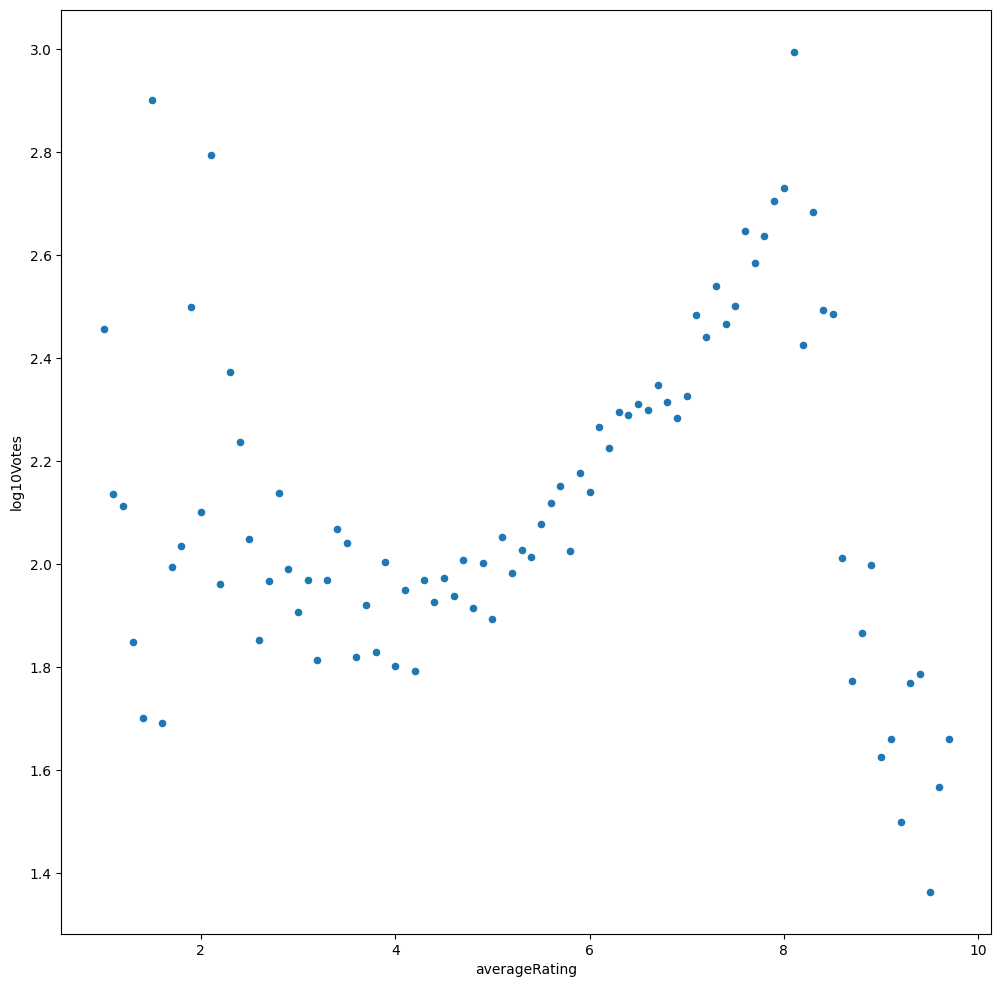

In [27]:
# 7.2

fig, ax = plt.subplots(figsize=(12,12))
df_new_averageRating.plot(kind='scatter', x = "averageRating", y = "log10Votes", ax=ax)